=== RAW (all) ===
Min  : -1.328782e+03
Max  : 1.756151e+03
Mean : 4.683447e-01
Std  : 2.676110e+01
Zero fraction : 99.32%

=== RAW (nonzero only) ===
Min  : -1.328782e+03
Max  : 1.756151e+03
Mean : 6.860306e+01
Std  : 3.165884e+02

=== Min-Max [0,1] (all) ===
xmin=-1.328782e+03, xmax=1.756151e+03
Min  : 0.000000e+00  (should be ~0)
Max  : 1.000000e+00  (should be ~1)
Mean : 4.308847e-01
Std  : 8.674774e-03

=== Min-Max [0,1] (nonzero only) ===
Min  : 0.000000e+00
Max  : 1.000000e+00
Mean : 4.529710e-01
Std  : 1.026241e-01


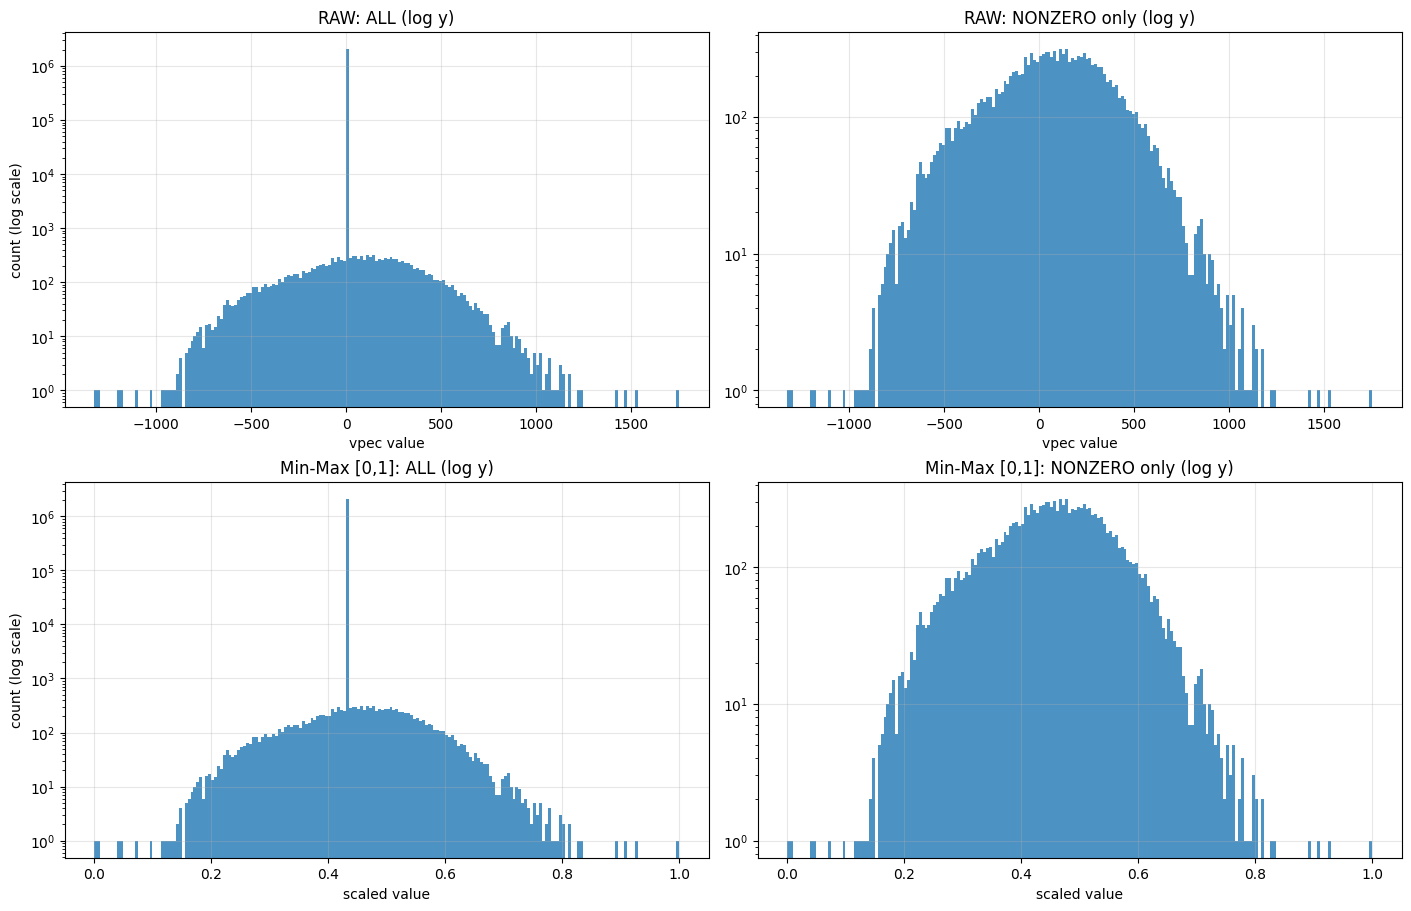

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

path = "/gpfs/adupuy/cosmicweb_asim/ASIM_TSC/samples/training/0.hdf5"
bins = 200
EPS = 1e-12

with h5py.File(path, "r") as f:
    vpec = f["input"][0][1].astype(np.float64)

x = vpec.ravel()
mask_nz = (x != 0)
x_nz = x[mask_nz]

xmin, xmax = float(x.min()), float(x.max())
den = (xmax - xmin)
if den < EPS:
    den = EPS
y = (x - xmin) / den
y_nz = y[mask_nz]

print("=== RAW (all) ===")
print(f"Min  : {x.min():.6e}")
print(f"Max  : {x.max():.6e}")
print(f"Mean : {x.mean():.6e}")
print(f"Std  : {x.std():.6e}")
print(f"Zero fraction : {(~mask_nz).mean()*100:.2f}%")
print()
print("=== RAW (nonzero only) ===")
print(f"Min  : {x_nz.min():.6e}")
print(f"Max  : {x_nz.max():.6e}")
print(f"Mean : {x_nz.mean():.6e}")
print(f"Std  : {x_nz.std():.6e}")
print()
print("=== Min-Max [0,1] (all) ===")
print(f"xmin={xmin:.6e}, xmax={xmax:.6e}")
print(f"Min  : {y.min():.6e}  (should be ~0)")
print(f"Max  : {y.max():.6e}  (should be ~1)")
print(f"Mean : {y.mean():.6e}")
print(f"Std  : {y.std():.6e}")
print()
print("=== Min-Max [0,1] (nonzero only) ===")
print(f"Min  : {y_nz.min():.6e}")
print(f"Max  : {y_nz.max():.6e}")
print(f"Mean : {y_nz.mean():.6e}")
print(f"Std  : {y_nz.std():.6e}")

fig, axes = plt.subplots(2, 2, figsize=(14, 9), constrained_layout=True)

# -------------------------
# RAW: ALL / NONZERO
# -------------------------
axes[0, 0].hist(x, bins=bins, alpha=0.8)
axes[0, 0].set_yscale("log")
axes[0, 0].set_title("RAW: ALL (log y)")
axes[0, 0].set_xlabel("vpec value")
axes[0, 0].set_ylabel("count (log scale)")
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(x_nz, bins=bins, alpha=0.8)
axes[0, 1].set_yscale("log")
axes[0, 1].set_title("RAW: NONZERO only (log y)")
axes[0, 1].set_xlabel("vpec value")
axes[0, 1].grid(True, alpha=0.3)

# -------------------------
# Min-Max: ALL / NONZERO
# (x축은 0~1 고정)
# -------------------------
axes[1, 0].hist(y, bins=bins, alpha=0.8, range=(0.0, 1.0))
axes[1, 0].set_yscale("log")
axes[1, 0].set_title("Min-Max [0,1]: ALL (log y)")
axes[1, 0].set_xlabel("scaled value")
axes[1, 0].set_ylabel("count (log scale)")
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(y_nz, bins=bins, alpha=0.8, range=(0.0, 1.0))
axes[1, 1].set_yscale("log")
axes[1, 1].set_title("Min-Max [0,1]: NONZERO only (log y)")
axes[1, 1].set_xlabel("scaled value")
axes[1, 1].grid(True, alpha=0.3)

plt.show()


=== output_rho RAW (all) ===
shape: (128, 128, 128)  dtype: float64
Min  : 2.696814e-02
Max  : 1.647671e+02
Mean : 1.000000e+00
Std  : 2.173102e+00
Zero fraction : 0.00%

=== output_rho RAW (nonzero only) ===
Min  : 2.696814e-02
Max  : 1.647671e+02
Mean : 1.000000e+00
Std  : 2.173102e+00

=== output_rho Min-Max [0,1] (all) ===
xmin=2.696814e-02, xmax=1.647671e+02
Min  : 0.000000e+00  (should be ~0)
Max  : 1.000000e+00  (should be ~1)
Mean : 5.906467e-03
Std  : 1.319109e-02


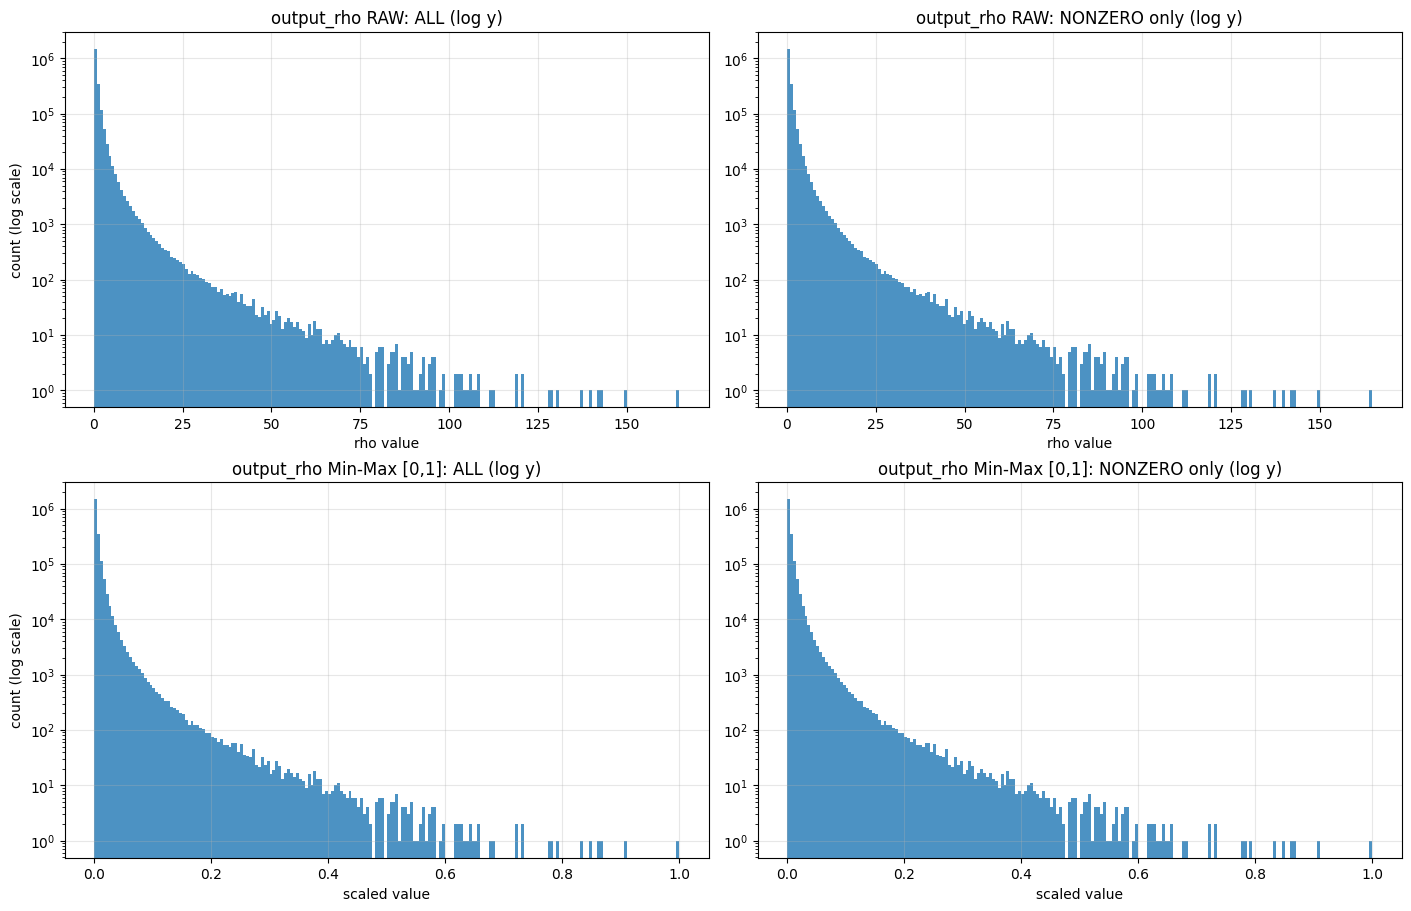

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Config
# =========================
path = "/gpfs/adupuy/cosmicweb_asim/ASIM_TSC/samples/training/0.hdf5"
bins = 200
EPS = 1e-12

# =========================
# Load output_rho
# =========================
with h5py.File(path, "r") as f:
    rho = f["output_rho"][0, 0].astype(np.float64)  # (H,W,D)

x = rho.ravel()
mask_nz = (x != 0)          # if you also want to inspect nonzero-only
x_nz = x[mask_nz]

# =========================
# Min-Max [0,1]
# =========================
xmin, xmax = float(x.min()), float(x.max())
den = xmax - xmin
if den < EPS:
    den = EPS
y = (x - xmin) / den
y_nz = y[mask_nz]

# =========================
# Print stats
# =========================
print("=== output_rho RAW (all) ===")
print(f"shape: {rho.shape}  dtype: float64")
print(f"Min  : {x.min():.6e}")
print(f"Max  : {x.max():.6e}")
print(f"Mean : {x.mean():.6e}")
print(f"Std  : {x.std():.6e}")
print(f"Zero fraction : {(~mask_nz).mean()*100:.2f}%")
print()
print("=== output_rho RAW (nonzero only) ===")
if x_nz.size:
    print(f"Min  : {x_nz.min():.6e}")
    print(f"Max  : {x_nz.max():.6e}")
    print(f"Mean : {x_nz.mean():.6e}")
    print(f"Std  : {x_nz.std():.6e}")
else:
    print("No nonzero values (all zeros).")
print()
print("=== output_rho Min-Max [0,1] (all) ===")
print(f"xmin={xmin:.6e}, xmax={xmax:.6e}")
print(f"Min  : {y.min():.6e}  (should be ~0)")
print(f"Max  : {y.max():.6e}  (should be ~1)")
print(f"Mean : {y.mean():.6e}")
print(f"Std  : {y.std():.6e}")

# =========================
# Plot: before/after hist (ALL + nonzero-only)
# =========================
fig, axes = plt.subplots(2, 2, figsize=(14, 9), constrained_layout=True)

# RAW ALL
axes[0, 0].hist(x, bins=bins, alpha=0.8)
axes[0, 0].set_yscale("log")
axes[0, 0].set_title("output_rho RAW: ALL (log y)")
axes[0, 0].set_xlabel("rho value")
axes[0, 0].set_ylabel("count (log scale)")
axes[0, 0].grid(True, alpha=0.3)

# RAW nonzero-only
axes[0, 1].hist(x_nz, bins=bins, alpha=0.8)
axes[0, 1].set_yscale("log")
axes[0, 1].set_title("output_rho RAW: NONZERO only (log y)")
axes[0, 1].set_xlabel("rho value")
axes[0, 1].grid(True, alpha=0.3)

# Min-Max ALL (0..1)
axes[1, 0].hist(y, bins=bins, alpha=0.8, range=(0.0, 1.0))
axes[1, 0].set_yscale("log")
axes[1, 0].set_title("output_rho Min-Max [0,1]: ALL (log y)")
axes[1, 0].set_xlabel("scaled value")
axes[1, 0].set_ylabel("count (log scale)")
axes[1, 0].grid(True, alpha=0.3)

# Min-Max nonzero-only
axes[1, 1].hist(y_nz, bins=bins, alpha=0.8, range=(0.0, 1.0))
axes[1, 1].set_yscale("log")
axes[1, 1].set_title("output_rho Min-Max [0,1]: NONZERO only (log y)")
axes[1, 1].set_xlabel("scaled value")
axes[1, 1].grid(True, alpha=0.3)

plt.show()


=== output_rho RAW (all) ===
shape: (128, 128, 128)  dtype: float64
Min  : 2.696814e-02
Max  : 1.647671e+02
Mean : 1.000000e+00
Std  : 2.173102e+00
Zero fraction : 0.00%

=== output_rho RAW (nonzero only) ===
Min  : 2.696814e-02
Max  : 1.647671e+02
Mean : 1.000000e+00
Std  : 2.173102e+00

=== output_rho Z-score standardized (all) ===
y = (x - mu) / sigma
mu=1.000000e+00, sigma=2.173102e+00
Min  : -4.477618e-01
Max  : 7.536098e+01
Mean : 2.168404e-19  (should be ~0)
Std  : 1.000000e+00   (should be ~1)


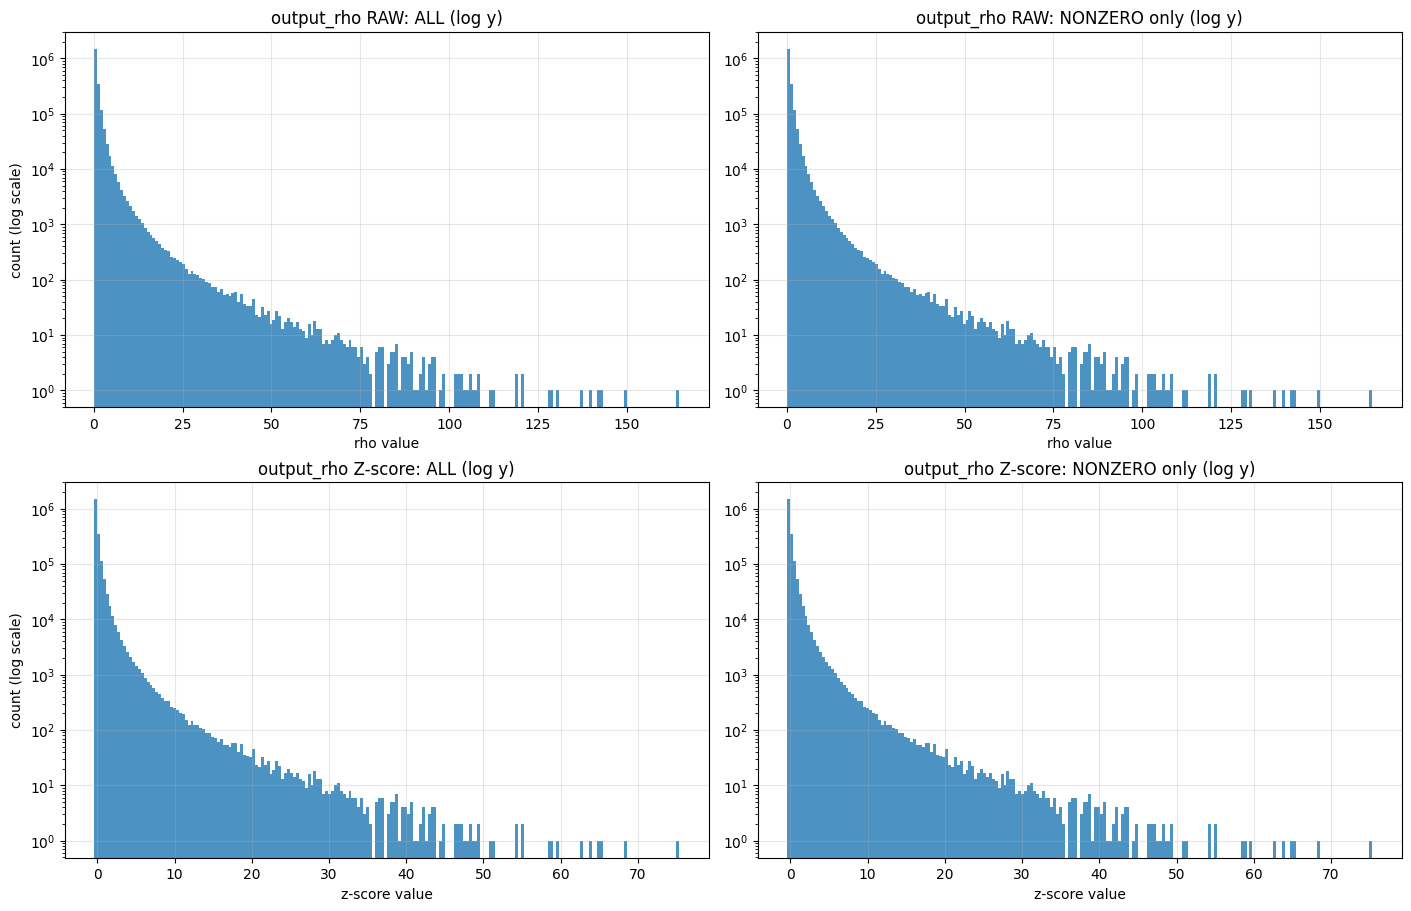

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Config
# =========================
path = "/gpfs/adupuy/cosmicweb_asim/ASIM_TSC/samples/training/0.hdf5"
bins = 200
EPS = 1e-12

# =========================
# Load output_rho
# =========================
with h5py.File(path, "r") as f:
    rho = f["output_rho"][0, 0].astype(np.float64)  # (H,W,D)

x = rho.ravel()
mask_nz = (x != 0)          # optional: inspect nonzero-only distribution
x_nz = x[mask_nz]

# =========================
# Z-score standardization
#   y = (x - mu) / sigma
# =========================
mu = float(x.mean())
sigma = float(x.std())
sigma = sigma if sigma > EPS else EPS

y = (x - mu) / sigma
y_nz = y[mask_nz]

# =========================
# Print stats
# =========================
print("=== output_rho RAW (all) ===")
print(f"shape: {rho.shape}  dtype: float64")
print(f"Min  : {x.min():.6e}")
print(f"Max  : {x.max():.6e}")
print(f"Mean : {x.mean():.6e}")
print(f"Std  : {x.std():.6e}")
print(f"Zero fraction : {(~mask_nz).mean()*100:.2f}%")
print()
print("=== output_rho RAW (nonzero only) ===")
if x_nz.size:
    print(f"Min  : {x_nz.min():.6e}")
    print(f"Max  : {x_nz.max():.6e}")
    print(f"Mean : {x_nz.mean():.6e}")
    print(f"Std  : {x_nz.std():.6e}")
else:
    print("No nonzero values (all zeros).")
print()
print("=== output_rho Z-score standardized (all) ===")
print("y = (x - mu) / sigma")
print(f"mu={mu:.6e}, sigma={sigma:.6e}")
print(f"Min  : {y.min():.6e}")
print(f"Max  : {y.max():.6e}")
print(f"Mean : {y.mean():.6e}  (should be ~0)")
print(f"Std  : {y.std():.6e}   (should be ~1)")

# =========================
# Plot: before/after hist (ALL + nonzero-only)
# =========================
fig, axes = plt.subplots(2, 2, figsize=(14, 9), constrained_layout=True)

# RAW ALL
axes[0, 0].hist(x, bins=bins, alpha=0.8)
axes[0, 0].set_yscale("log")
axes[0, 0].set_title("output_rho RAW: ALL (log y)")
axes[0, 0].set_xlabel("rho value")
axes[0, 0].set_ylabel("count (log scale)")
axes[0, 0].grid(True, alpha=0.3)

# RAW nonzero-only
axes[0, 1].hist(x_nz, bins=bins, alpha=0.8)
axes[0, 1].set_yscale("log")
axes[0, 1].set_title("output_rho RAW: NONZERO only (log y)")
axes[0, 1].set_xlabel("rho value")
axes[0, 1].grid(True, alpha=0.3)

# Z-score ALL
axes[1, 0].hist(y, bins=bins, alpha=0.8)
axes[1, 0].set_yscale("log")
axes[1, 0].set_title("output_rho Z-score: ALL (log y)")
axes[1, 0].set_xlabel("z-score value")
axes[1, 0].set_ylabel("count (log scale)")
axes[1, 0].grid(True, alpha=0.3)

# Z-score nonzero-only
axes[1, 1].hist(y_nz, bins=bins, alpha=0.8)
axes[1, 1].set_yscale("log")
axes[1, 1].set_title("output_rho Z-score: NONZERO only (log y)")
axes[1, 1].set_xlabel("z-score value")
axes[1, 1].grid(True, alpha=0.3)

plt.show()


=== vpec RAW (all) ===
shape: (128, 128, 128)  dtype: float64
Min  : -1.328782e+03
Max  : 1.756151e+03
Mean : 4.683447e-01
Std  : 2.676110e+01
Zero fraction : 99.32%

=== vpec RAW (nonzero only) ===
Min  : -1.328782e+03
Max  : 1.756151e+03
Mean : 6.860306e+01
Std  : 3.165884e+02

=== vpec Z-score standardized (all) ===
y = (x - mu) / sigma
mu=4.683447e-01, sigma=2.676110e+01
Min  : -4.967099e+01
Max  : 6.560578e+01
Mean : -1.531436e-17  (should be ~0)
Std  : 1.000000e+00   (should be ~1)


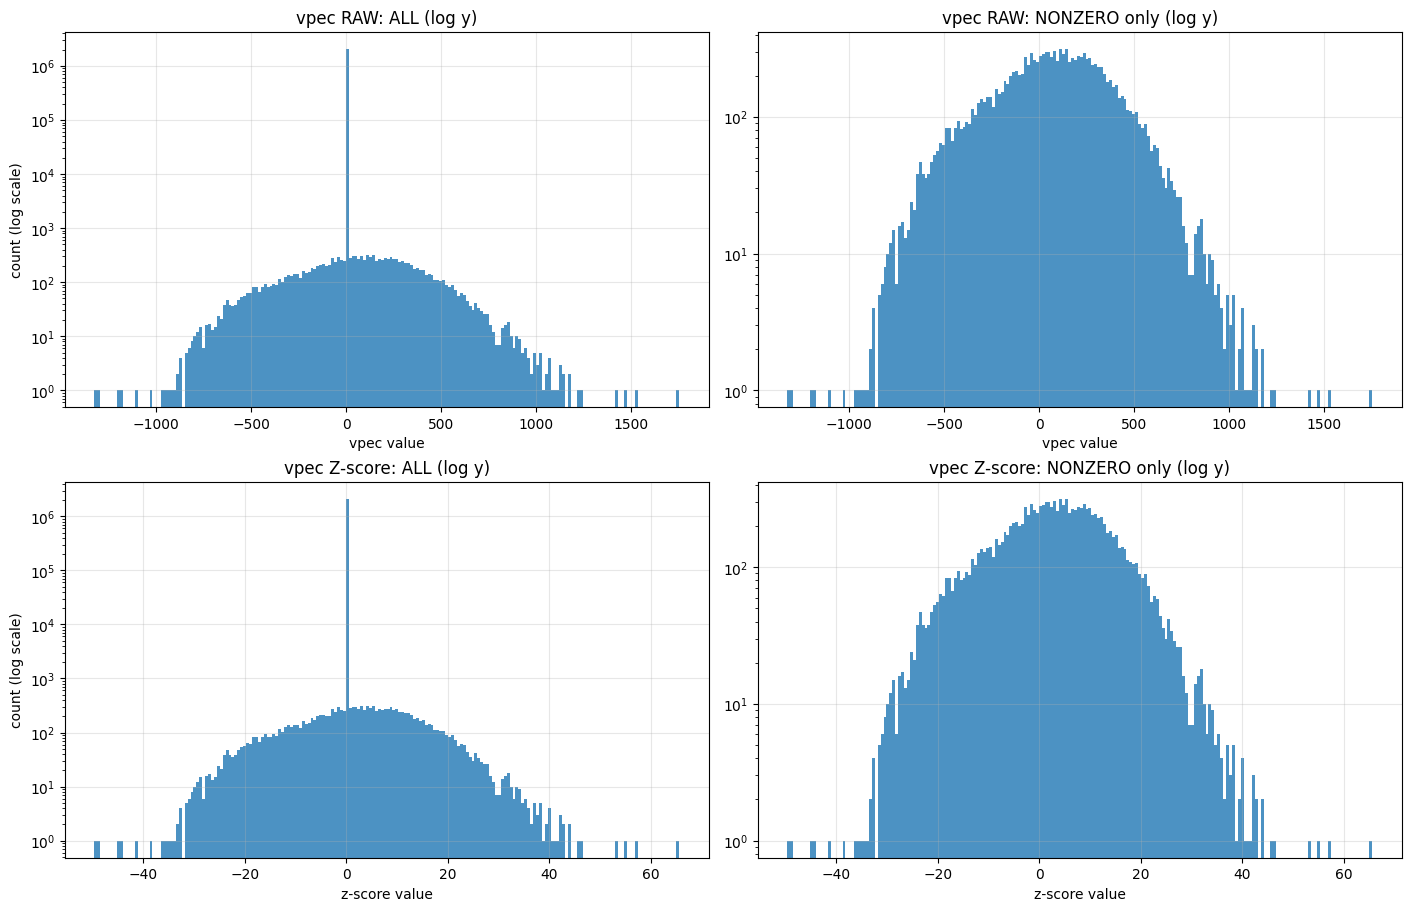

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Config
# =========================
path = "/gpfs/adupuy/cosmicweb_asim/ASIM_TSC/samples/training/0.hdf5"
bins = 200
EPS = 1e-12

# =========================
# Load vpec
# =========================
with h5py.File(path, "r") as f:
    vpec = f["input"][0][1].astype(np.float64)

x = vpec.ravel()
mask_nz = (x != 0)   # RAW nonzero mask
x_nz = x[mask_nz]

# =========================
# Z-score standardization
#   y = (x - mu) / sigma
# =========================
mu = float(x.mean())
sigma = float(x.std())
sigma = sigma if sigma > EPS else EPS

y = (x - mu) / sigma
y_nz = y[mask_nz]

# =========================
# Print stats
# =========================
print("=== vpec RAW (all) ===")
print(f"shape: {vpec.shape}  dtype: float64")
print(f"Min  : {x.min():.6e}")
print(f"Max  : {x.max():.6e}")
print(f"Mean : {x.mean():.6e}")
print(f"Std  : {x.std():.6e}")
print(f"Zero fraction : {(~mask_nz).mean()*100:.2f}%")
print()
print("=== vpec RAW (nonzero only) ===")
if x_nz.size:
    print(f"Min  : {x_nz.min():.6e}")
    print(f"Max  : {x_nz.max():.6e}")
    print(f"Mean : {x_nz.mean():.6e}")
    print(f"Std  : {x_nz.std():.6e}")
print()
print("=== vpec Z-score standardized (all) ===")
print("y = (x - mu) / sigma")
print(f"mu={mu:.6e}, sigma={sigma:.6e}")
print(f"Min  : {y.min():.6e}")
print(f"Max  : {y.max():.6e}")
print(f"Mean : {y.mean():.6e}  (should be ~0)")
print(f"Std  : {y.std():.6e}   (should be ~1)")

# =========================
# Plot: before/after hist (ALL + nonzero-only)
# =========================
fig, axes = plt.subplots(2, 2, figsize=(14, 9), constrained_layout=True)

# RAW ALL
axes[0, 0].hist(x, bins=bins, alpha=0.8)
axes[0, 0].set_yscale("log")
axes[0, 0].set_title("vpec RAW: ALL (log y)")
axes[0, 0].set_xlabel("vpec value")
axes[0, 0].set_ylabel("count (log scale)")
axes[0, 0].grid(True, alpha=0.3)

# RAW nonzero-only
axes[0, 1].hist(x_nz, bins=bins, alpha=0.8)
axes[0, 1].set_yscale("log")
axes[0, 1].set_title("vpec RAW: NONZERO only (log y)")
axes[0, 1].set_xlabel("vpec value")
axes[0, 1].grid(True, alpha=0.3)

# Z-score ALL
axes[1, 0].hist(y, bins=bins, alpha=0.8)
axes[1, 0].set_yscale("log")
axes[1, 0].set_title("vpec Z-score: ALL (log y)")
axes[1, 0].set_xlabel("z-score value")
axes[1, 0].set_ylabel("count (log scale)")
axes[1, 0].grid(True, alpha=0.3)

# Z-score nonzero-only
axes[1, 1].hist(y_nz, bins=bins, alpha=0.8)
axes[1, 1].set_yscale("log")
axes[1, 1].set_title("vpec Z-score: NONZERO only (log y)")
axes[1, 1].set_xlabel("z-score value")
axes[1, 1].grid(True, alpha=0.3)

plt.show()


RAW:        mean/std = 0.46834468805758434 26.761097922599117
log(x):     mean/std = 0.0035259105161457873 0.1891087659873456
A=log->z:   mean/std = -3.9085488318102435e-17 1.0000000000000007  (should ~0, ~1)
B=z->log:   mean/std = -0.005968491863983546 0.08056226806013055
raw_zero_frac=99.32%


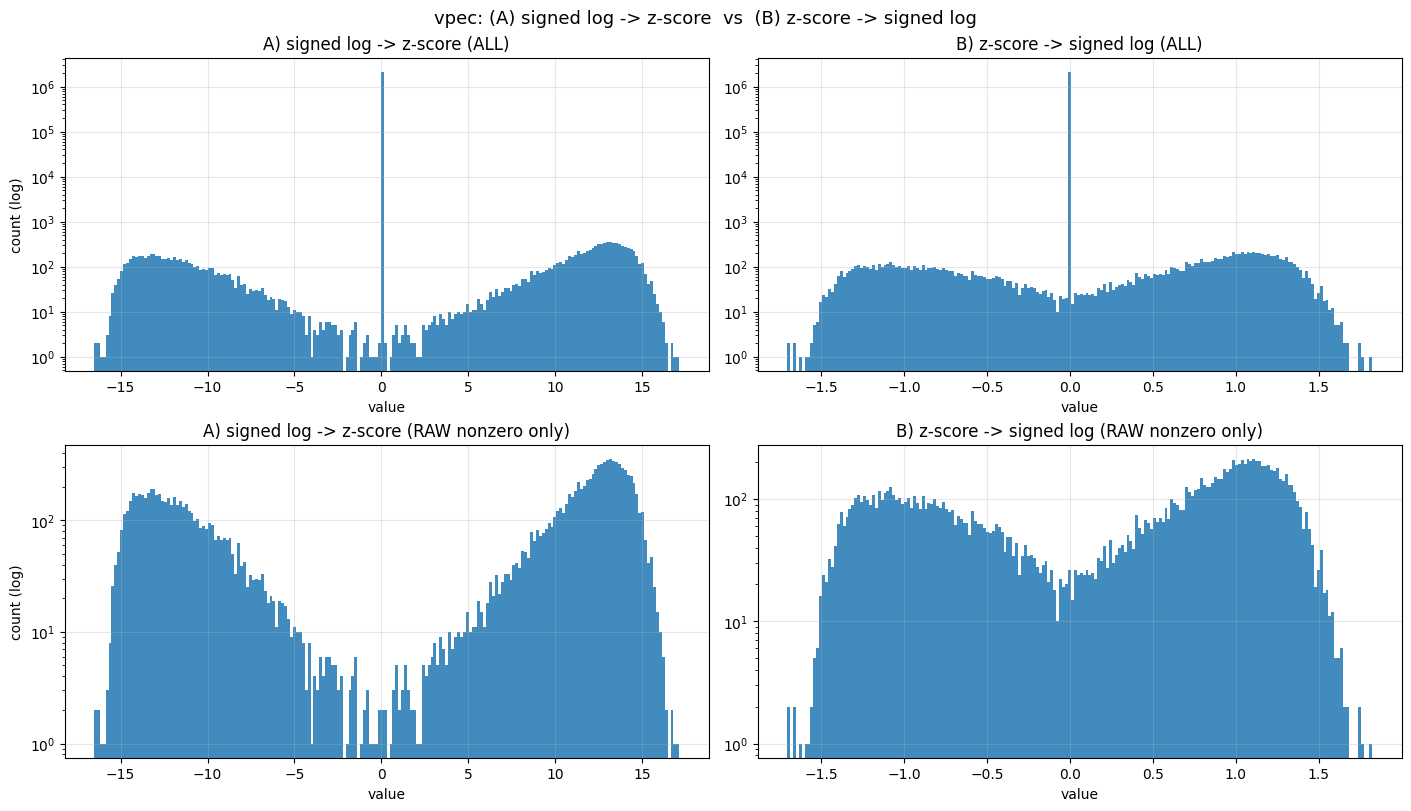

In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Config
# =========================
path = "/gpfs/adupuy/cosmicweb_asim/ASIM_TSC/samples/training/0.hdf5"
bins = 200
EPS = 1e-12

# =========================
# Helpers
# =========================
def signed_log10_1p_abs(x, eps=1e-12):
    # signed log so negatives are supported
    return np.sign(x) * np.log10(1.0 + np.abs(x) + eps)

def zscore(x, eps=1e-12):
    mu = float(np.mean(x))
    sig = float(np.std(x))
    sig = sig if sig > eps else eps
    return (x - mu) / sig, mu, sig

# =========================
# Load vpec
# =========================
with h5py.File(path, "r") as f:
    vpec = f["input"][0][1].astype(np.float64)

x = vpec.ravel()
mask_nz = (x != 0)  # RAW nonzero mask

# =========================
# Variant A: log -> zscore
# =========================
log_x = signed_log10_1p_abs(x, EPS)
a, a_mu, a_sig = zscore(log_x, EPS)

# =========================
# Variant B: zscore -> log
# =========================
z_x, z_mu, z_sig = zscore(x, EPS)
b = signed_log10_1p_abs(z_x, EPS)

# =========================
# Print summary
# =========================
print("RAW:        mean/std =", x.mean(), x.std())
print("log(x):     mean/std =", log_x.mean(), log_x.std())
print("A=log->z:   mean/std =", a.mean(), a.std(), " (should ~0, ~1)")
print("B=z->log:   mean/std =", b.mean(), b.std())
print(f"raw_zero_frac={(~mask_nz).mean()*100:.2f}%")

# =========================
# Plot: 2x2 (ALL + RAW-nonzero-only for each variant)
# =========================
fig, axes = plt.subplots(2, 2, figsize=(14, 8), constrained_layout=True)
fig.suptitle("vpec: (A) signed log -> z-score  vs  (B) z-score -> signed log", fontsize=13)

# --- A (ALL) ---
axes[0, 0].hist(a, bins=bins, alpha=0.85)
axes[0, 0].set_yscale("log")
axes[0, 0].set_title("A) signed log -> z-score (ALL)")
axes[0, 0].set_xlabel("value")
axes[0, 0].set_ylabel("count (log)")
axes[0, 0].grid(True, alpha=0.3)

# --- A (RAW nonzero only) ---
axes[1, 0].hist(a[mask_nz], bins=bins, alpha=0.85)
axes[1, 0].set_yscale("log")
axes[1, 0].set_title("A) signed log -> z-score (RAW nonzero only)")
axes[1, 0].set_xlabel("value")
axes[1, 0].set_ylabel("count (log)")
axes[1, 0].grid(True, alpha=0.3)

# --- B (ALL) ---
axes[0, 1].hist(b, bins=bins, alpha=0.85)
axes[0, 1].set_yscale("log")
axes[0, 1].set_title("B) z-score -> signed log (ALL)")
axes[0, 1].set_xlabel("value")
axes[0, 1].grid(True, alpha=0.3)

# --- B (RAW nonzero only) ---
axes[1, 1].hist(b[mask_nz], bins=bins, alpha=0.85)
axes[1, 1].set_yscale("log")
axes[1, 1].set_title("B) z-score -> signed log (RAW nonzero only)")
axes[1, 1].set_xlabel("value")
axes[1, 1].grid(True, alpha=0.3)

plt.show()


=== output_rho transforms ===
shape=(128, 128, 128), dtype=float64, raw_zero_frac=0.00%
RAW x        mean=1, std=2.1731, min=0.0269681, max=164.767
log(x)       mean=0.235395, std=0.192977, min=0.011557, max=2.2195
A=log->z     mean=6.37945e-16, std=1, min=-1.15992, max=10.2815    (mean~0, std~1)
Z=zscore     mean=2.1684e-19, std=1, min=-0.447762, max=75.361    (mean~0, std~1)
B=z->log     mean=-0.0291716, std=0.163111, min=-0.160697, max=1.88287


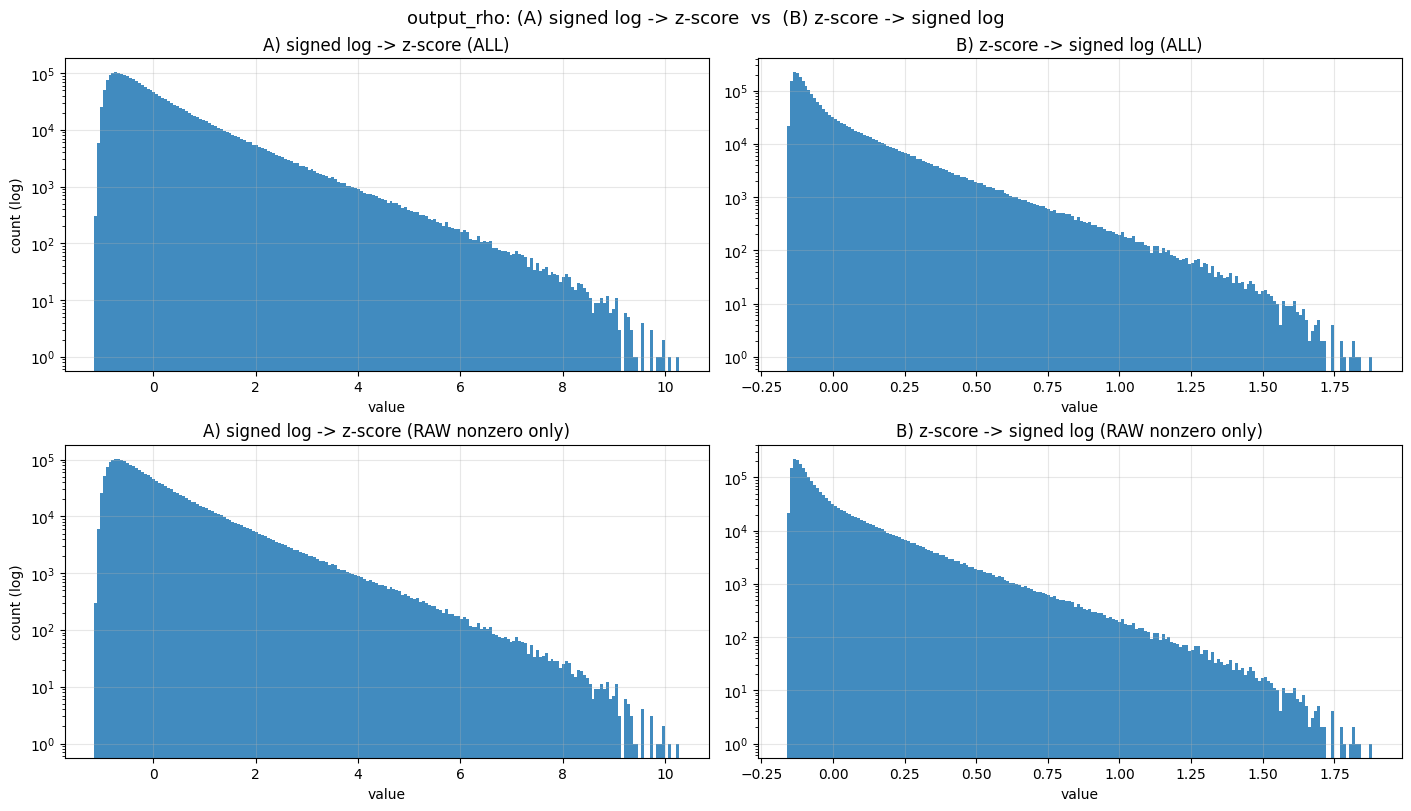

In [6]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Config
# =========================
path = "/gpfs/adupuy/cosmicweb_asim/ASIM_TSC/samples/training/0.hdf5"
bins = 200
EPS = 1e-12

# =========================
# Helpers
# =========================
def signed_log10_1p_abs(x, eps=1e-12):
    # signed log so negatives are supported (rho가 양수만이어도 안전)
    return np.sign(x) * np.log10(1.0 + np.abs(x) + eps)

def zscore(x, eps=1e-12):
    mu = float(np.mean(x))
    sig = float(np.std(x))
    sig = sig if sig > eps else eps
    return (x - mu) / sig, mu, sig

def stats_line(name, arr):
    arr = np.asarray(arr)
    return f"{name:12s} mean={arr.mean():.6g}, std={arr.std():.6g}, min={arr.min():.6g}, max={arr.max():.6g}"

# =========================
# Load rho
# =========================
with h5py.File(path, "r") as f:
    rho = f["output_rho"][0, 0].astype(np.float64)  # (H,W,D)

x = rho.ravel()
mask_nz = (x != 0)  # RAW nonzero mask (원하면 비교용)
zero_frac = (~mask_nz).mean() * 100.0

# =========================
# Variant A: log -> zscore
# =========================
log_x = signed_log10_1p_abs(x, EPS)
A, A_mu, A_sig = zscore(log_x, EPS)

# =========================
# Variant B: zscore -> log
# =========================
Z, Z_mu, Z_sig = zscore(x, EPS)
B = signed_log10_1p_abs(Z, EPS)

# =========================
# Print summary
# =========================
print("=== output_rho transforms ===")
print(f"shape={rho.shape}, dtype=float64, raw_zero_frac={zero_frac:.2f}%")
print(stats_line("RAW x", x))
print(stats_line("log(x)", log_x))
print(stats_line("A=log->z", A), "   (mean~0, std~1)")
print(stats_line("Z=zscore", Z), "   (mean~0, std~1)")
print(stats_line("B=z->log", B))

# =========================
# Plot: 2x2 (ALL + RAW-nonzero-only for each variant)
# =========================
fig, axes = plt.subplots(2, 2, figsize=(14, 8), constrained_layout=True)
fig.suptitle("output_rho: (A) signed log -> z-score  vs  (B) z-score -> signed log", fontsize=13)

# --- A (ALL) ---
axes[0, 0].hist(A, bins=bins, alpha=0.85)
axes[0, 0].set_yscale("log")
axes[0, 0].set_title("A) signed log -> z-score (ALL)")
axes[0, 0].set_xlabel("value")
axes[0, 0].set_ylabel("count (log)")
axes[0, 0].grid(True, alpha=0.3)

# --- A (RAW nonzero only) ---
axes[1, 0].hist(A[mask_nz], bins=bins, alpha=0.85)
axes[1, 0].set_yscale("log")
axes[1, 0].set_title("A) signed log -> z-score (RAW nonzero only)")
axes[1, 0].set_xlabel("value")
axes[1, 0].set_ylabel("count (log)")
axes[1, 0].grid(True, alpha=0.3)

# --- B (ALL) ---
axes[0, 1].hist(B, bins=bins, alpha=0.85)
axes[0, 1].set_yscale("log")
axes[0, 1].set_title("B) z-score -> signed log (ALL)")
axes[0, 1].set_xlabel("value")
axes[0, 1].grid(True, alpha=0.3)

# --- B (RAW nonzero only) ---
axes[1, 1].hist(B[mask_nz], bins=bins, alpha=0.85)
axes[1, 1].set_yscale("log")
axes[1, 1].set_title("B) z-score -> signed log (RAW nonzero only)")
axes[1, 1].set_xlabel("value")
axes[1, 1].grid(True, alpha=0.3)

plt.show()
